import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
df=pd.read_excel(r'C:\Users\Humphery\Desktop\customers.xlsx')
df.head()

UNIVARINT


In [2]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [3]:
df.drop(columns='CustomerID',axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


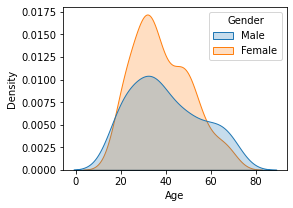

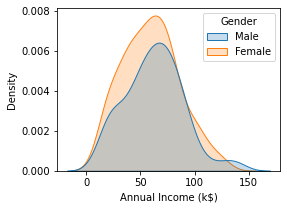

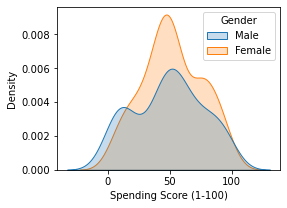

In [4]:
column=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in column:
    plt.figure(figsize=(4,3))
    sns.kdeplot(df[i],hue=df['Gender'],shade=True)

BIVARIANT

In [5]:
clustring=KMeans(5)
clustring.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['income and spending_clusters']=clustring.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income and spending_clusters
0,Male,19,15,39,2
1,Male,21,15,81,4
2,Female,20,16,6,2
3,Female,23,16,77,4
4,Female,31,17,40,2


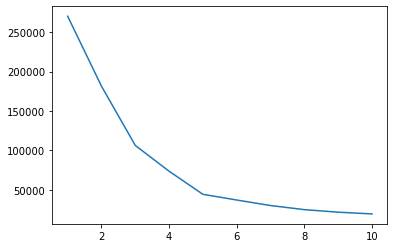

In [6]:
best_clusters=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i, init='k-means++')
    kmean.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    kmean.inertia_
    best_clusters.append(kmean.inertia_)
plt.plot(range(1,11),best_clusters)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

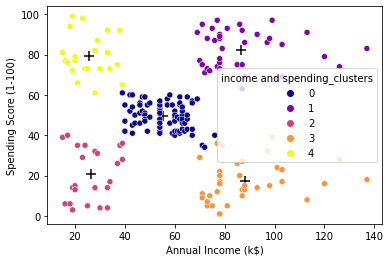

In [13]:
center=pd.DataFrame(clustring.cluster_centers_)
center.columns=['x','y']
plt.scatter(x=center['x'],y=center['y'],s=90,c='black', marker="+")
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='income and spending_clusters',palette='plasma')

In [17]:
pd.crosstab(df['income and spending_clusters'],df['Gender'],normalize='index')

Gender,Female,Male
income and spending_clusters,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.608696,0.391304
3,0.457143,0.542857
4,0.590909,0.409091


                   ANALYSIS


IT CLEARLY SHOWN THAT FEMALES WITH IN THE AGE RANGE (30 TO 50)  WHICH BELONGS TO CLUSRTER 1 SPEND  MORE THAN MALES WHO EARNS MORE SALARY INCOME.
CLEARLY WE RECOMMEND OUR PRODUCTS TO FEMALES WHO ARE WITH IN THE AGE BRACKET IN THIS THIS WE GET MORE  PROFIT IN OUR COMPANY.